In [1]:
# Data manipulation lib
import pandas as pd
import numpy as np

# Data visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data pre-processing lib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# model building 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# model evaluation
from sklearn import metrics
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
data = pd.read_excel(r'C:\Users\Atul\Dropbox\My PC (LAPTOP-EGHOUM3O)\Downloads\CHURNDATA (1).xlsx')

# Exploratory Data Analysis (EDA)

In [3]:
# coping original data into df
df = data.copy(deep=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [5]:
df.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [6]:
# Analyzing Important Continous features
# checking different charater in continuos features

In [7]:
df.columns

Index(['CIF', 'CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Gender',
       'CUS_Marital_Status', 'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

In [8]:
# Analyzing age
df['AGE'].unique()

array([ 49,  46,  53,  15,  48,  37,  16,  39,  59,  64,  51,  43,  29,
        32,  35,  18,  30,  41,  75,  66,  62,  20,  77,  69,  34,  82,
        60,  87,  54,  36,  52,  33,  58,  45,  40,  65,  50,  27,  42,
        31,  44,  76,  47,  38,  70,  63,  61,  57,  25,  56,  26,  72,
        67, 119,  55,  17,  21,  14,  89,  24,  28,  73,  71,  23,  68,
        22,  81,  79,  74,  86,  19,  83], dtype=int64)

In [9]:
df['AGE'].value_counts().head()

41    57
43    57
37    51
39    49
40    47
Name: AGE, dtype: int64

In [10]:
# Analyzing CUS_Month_Income
df['CUS_Month_Income'].value_counts().head()

1000000.0    100
2000000.0     91
2500000.0     69
5000000.0     61
2500.0        56
Name: CUS_Month_Income, dtype: int64

In [11]:
# Analyzing # total debit transactions for S1
df['# total debit transactions for S1'].value_counts().head()

0     106
1      55
4      34
12     30
20     28
Name: # total debit transactions for S1, dtype: int64

In [12]:
# Analyzing # total debit transactions for S2
df['# total debit transactions for S2'].value_counts().head()

0     152
1      48
2      34
17     27
13     26
Name: # total debit transactions for S2, dtype: int64

In [13]:
# Analyzing # total debit transactions for S3
df['# total debit transactions for S3'].value_counts().head()

0     175
1      55
2      30
13     24
16     24
Name: # total debit transactions for S3, dtype: int64

In [14]:
# analyzing 'total debit amount for S1'
df['total debit amount for S1'].value_counts().head()

0.00       106
693.60      11
817.02       7
1000.00      3
907.80       3
Name: total debit amount for S1, dtype: int64

In [15]:
# analyzing 'total debit amount for S2'
df['total debit amount for S2'].value_counts().head()

0.00       152
693.60       6
800.00       5
414.12       5
1200.00      5
Name: total debit amount for S2, dtype: int64

In [16]:
# analyzing 'total debit amount for S3'
df['total debit amount for S3'].value_counts().head()

0.00       175
749.70      15
200.00       7
883.32       6
1000.00      3
Name: total debit amount for S3, dtype: int64

In [17]:
# Analyzing '# total credit transactions for S1'
df['# total credit transactions for S1'].value_counts().head()

0    341
7    184
6    107
1     82
8     74
Name: # total credit transactions for S1, dtype: int64

In [18]:
# Analyzing '# total credit transactions for S2'
df['# total credit transactions for S2'].value_counts().head()

0    346
6    195
7     99
1     69
2     52
Name: # total credit transactions for S2, dtype: int64

In [19]:
# Analyzing '# total credit transactions for S3'
df['# total credit transactions for S3'].value_counts().head()

0    359
7    123
8     93
6     72
1     69
Name: # total credit transactions for S3, dtype: int64

In [20]:
# Analyzing 'total credit amount for S1'
df['total credit amount for S1'].value_counts().head()

0.0        341
10000.0      8
2000.0       6
20000.0      5
4000.0       5
Name: total credit amount for S1, dtype: int64

In [21]:
# Analyzing 'total credit amount for S2'
df['total credit amount for S2'].value_counts().head()

0.0        346
10000.0      7
1000.0       5
12000.0      5
2000.0       4
Name: total credit amount for S2, dtype: int64

In [22]:
# Analyzing 'total credit amount for S3'
df['total credit amount for S3'].value_counts().head()

0.0        359
3000.0       5
13000.0      5
24000.0      4
1000.0       4
Name: total credit amount for S3, dtype: int64

In [23]:
# Analyzing total debit amount
df['total debit amount'].value_counts().head()

0.00       12
800.00      4
1443.30     4
693.60      4
1700.34     3
Name: total debit amount, dtype: int64

In [24]:
# Analyzing total debit transaction
df['total debit transactions'].value_counts().head()

1    37
2    29
3    23
7    18
6    17
Name: total debit transactions, dtype: int64

In [25]:
# Analyzing total credit amount
df['total credit amount'].value_counts().head()

0.0         212
1000.0        7
2000.0        6
25000.0       4
212000.0      3
Name: total credit amount, dtype: int64

In [26]:
# Analyzing total credit transaction
df['total credit transactions'].value_counts().head()

0     212
21     82
1      71
20     66
2      49
Name: total credit transactions, dtype: int64

In [27]:
# Analyzing total transaction
df['total transactions'].value_counts().head()

1    31
6    23
2    23
3    22
8    19
Name: total transactions, dtype: int64

In [28]:
# Analyzing CUS_Target
df['CUS_Target'].value_counts().head()

2223    746
2222    383
2212     53
2211     25
2232     13
Name: CUS_Target, dtype: int64

In [29]:
# Analyzing trend in data
# Analyzing Age cus month income wrt Status
pd.pivot_table(data = df, values = ['AGE', 'CUS_Month_Income'], index=['Status'], aggfunc=['mean', 'median', 'max', 'min'])

mean                  median                   max  \
              AGE CUS_Month_Income    AGE CUS_Month_Income  AGE   
Status                                                            
ACTIVE  46.820939     2.685969e+06     46        1500000.0   87   
CHURN   46.414097     3.123986e+06     44        1000000.0  119   

                        min                   
       CUS_Month_Income AGE CUS_Month_Income  
Status                                        
ACTIVE       50000000.0  14              0.0  
CHURN        80000000.0  14              0.0

<AxesSubplot:xlabel='Status', ylabel='AGE'>

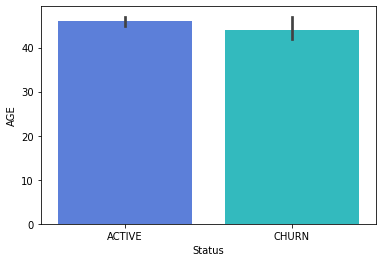

In [30]:
sns.set_palette("turbo")
sns.barplot(data = df, x='Status', y= 'AGE', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='CUS_Month_Income'>

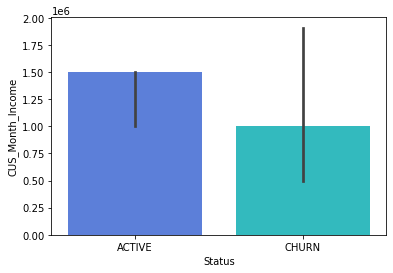

In [31]:
sns.set_palette("turbo")
sns.barplot(data = df, x='Status', y= 'CUS_Month_Income', estimator = np.median)

In [103]:
# mean is bite similars to median  in case of age 
# It means there are extreme values present in the data set(mean>median) in case income

In [32]:
# Analyzing # total debit transactions for S1, S2, S3 w.r.t Status
pd.pivot_table(data = df, values = ['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3'], index=['Status'], aggfunc=['mean', 'median', 'max'])

mean                                    \
       # total debit transactions for S1 # total debit transactions for S2   
Status                                                                       
ACTIVE                         62.925636                         65.280822   
CHURN                          15.259912                         12.458150   

                                                                    median  \
       # total debit transactions for S3 # total debit transactions for S1   
Status                                                                       
ACTIVE                         68.292564                              29.5   
CHURN                           5.973568                               6.0   

                                                                            \
       # total debit transactions for S2 # total debit transactions for S3   
Status                                                                       
ACTIVE                                32                                35   
CHURN                                  2                                 0   

                                     max                                    \
       # total debit transactions for S1 # total debit transactions for S2   
Status                                                                       
ACTIVE                               715                               547   
CHURN                                366                               450   

                                          
       # total debit transactions for S3  
Status                                    
ACTIVE                               757  
CHURN                                 77

<AxesSubplot:xlabel='Status', ylabel='# total debit transactions for S1'>

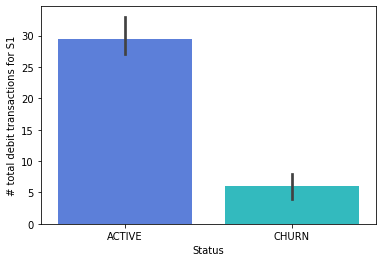

In [33]:
sns.barplot(data = df, x='Status', y= '# total debit transactions for S1', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='# total debit transactions for S2'>

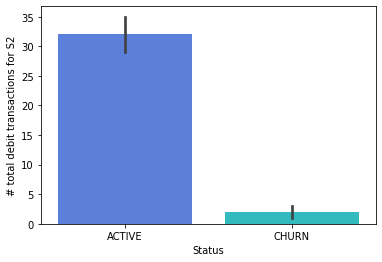

In [34]:
sns.set_palette("turbo")
sns.barplot(data = df, x='Status', y= '# total debit transactions for S2', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='# total debit transactions for S3'>

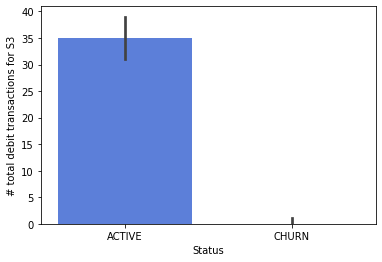

In [35]:
sns.barplot(data = df, x='Status', y= '# total debit transactions for S3', estimator = np.median)

In [ ]:
# transaction are bite higher in in branch 1 in case of chrun customers,
# And in case of branch 3 zero churn customers (transactions)
# It means there are extreme values present in the data set(mean>median)

In [36]:
# Analyzing total debit amount for S1 S2 S3 w.r.t Status
pd.pivot_table(data = df, values = ['total debit amount for S1','total debit amount for S2','total debit amount for S3'], index=['Status'], aggfunc =['mean', 'median', 'max'])

mean                            \
       total debit amount for S1 total debit amount for S2   
Status                                                       
ACTIVE             365222.365851             364381.880215   
CHURN               87479.381938              59889.302115   

                                                    median  \
       total debit amount for S3 total debit amount for S1   
Status                                                       
ACTIVE             368362.331546                  72572.05   
CHURN               26034.045330                   6350.00   

                                                            \
       total debit amount for S2 total debit amount for S3   
Status                                                       
ACTIVE                 87131.895                  90733.44   
CHURN                   2000.000                      0.00   

                             max                            \
       total debit amount for S1 total debit amount for S2   
Status                                                       
ACTIVE               35733493.37               37233815.61   
CHURN                 8629664.55                4763854.62   

                                  
       total debit amount for S3  
Status                            
ACTIVE               18665107.09  
CHURN                  845373.88

<AxesSubplot:xlabel='Status', ylabel='total debit amount for S1'>

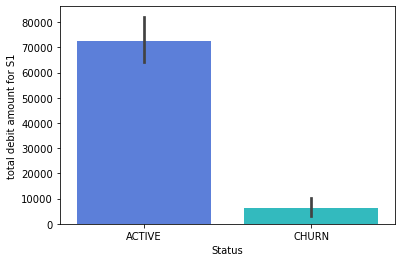

In [37]:
sns.barplot(data = df, x='Status', y= 'total debit amount for S1', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='total debit amount for S2'>

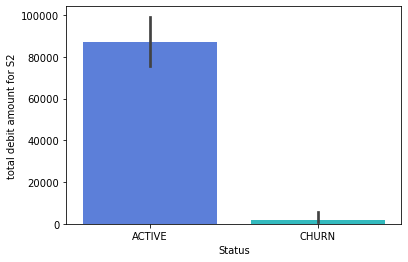

In [38]:
sns.barplot(data = df, x='Status', y= 'total debit amount for S2', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='total debit amount for S3'>

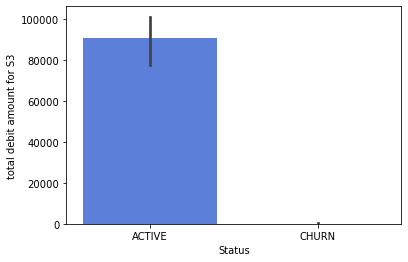

In [39]:
sns.barplot(data = df, x='Status', y= 'total debit amount for S3', estimator = np.median)

In [ ]:
# debit amount are bite higher in in branch 1 in case of chrun customers,
# And in case of branch 3 zero churn customers (amount)
# It means there are extreme values present in the data set(mean>median)

In [40]:
# Analyzing # total credit transactions for S1 S2 S3 w.r.t Status
pd.pivot_table(data = df, values = ['# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3'], index=['Status'], aggfunc =['mean', 'median', 'max'])

mean                                     \
       # total credit transactions for S1 # total credit transactions for S2   
Status                                                                         
ACTIVE                           8.656556                           9.493151   
CHURN                            2.916300                           2.766520   

                                                                      median  \
       # total credit transactions for S3 # total credit transactions for S1   
Status                                                                         
ACTIVE                          10.216243                                  7   
CHURN                            1.740088                                  0   

                                                                              \
       # total credit transactions for S2 # total credit transactions for S3   
Status                                                                         
ACTIVE                                  6                                  7   
CHURN                                   0                                  0   

                                      max                                     \
       # total credit transactions for S1 # total credit transactions for S2   
Status                                                                         
ACTIVE                                189                                142   
CHURN                                 104                                126   

                                           
       # total credit transactions for S3  
Status                                     
ACTIVE                                169  
CHURN                                  39

<AxesSubplot:xlabel='Status', ylabel='# total credit transactions for S1'>

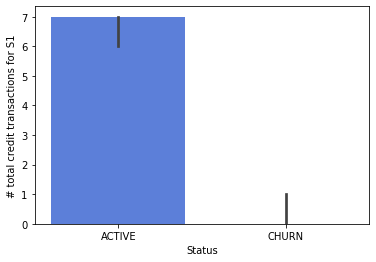

In [41]:
sns.barplot(data = df, x='Status', y= '# total credit transactions for S1', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='# total credit transactions for S2'>

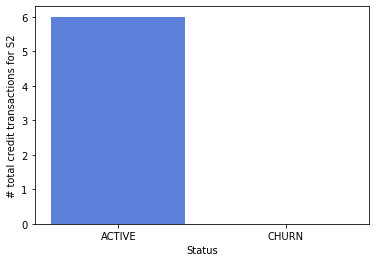

In [42]:
sns.barplot(data = df, x='Status', y= '# total credit transactions for S2', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='# total credit transactions for S3'>

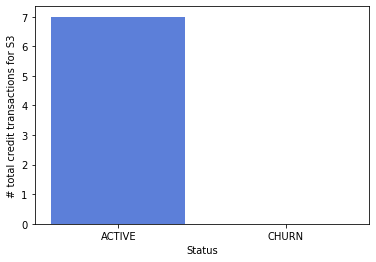

In [43]:
sns.barplot(data = df, x='Status', y= '# total credit transactions for S3', estimator = np.median)

In [104]:
# credit transaction are zero in all branchs in case of chrun customers,
# It seems to be like churn customers are to using credit card 
# It means there are extreme values present in the data set(difference btw median and max)

In [44]:
# Analyzing total credit amount for S1 S2 S3 w.r.t Status
pd.pivot_table(data = df, values = ['total credit amount for S1','total credit amount for S2','total credit amount for S3'], index=['Status'], aggfunc =['mean', 'median', 'max'])

mean                             \
       total credit amount for S1 total credit amount for S2   
Status                                                         
ACTIVE              364959.288845              377359.314843   
CHURN                56806.582467               47351.616123   

                                                      median  \
       total credit amount for S3 total credit amount for S1   
Status                                                         
ACTIVE              364140.900421                   57736.72   
CHURN                22257.761630                       0.00   

                                                              \
       total credit amount for S2 total credit amount for S3   
Status                                                         
ACTIVE                   70512.45                  65591.985   
CHURN                        0.00                      0.000   

                              max                             \
       total credit amount for S1 total credit amount for S2   
Status                                                         
ACTIVE                49206876.78                17537991.91   
CHURN                  3850000.00                 5387378.32   

                                   
       total credit amount for S3  
Status                             
ACTIVE                37647077.15  
CHURN                  1114000.00

<AxesSubplot:xlabel='Status', ylabel='total credit amount for S1'>

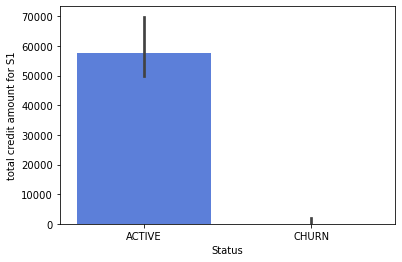

In [45]:
sns.barplot(data = df, x='Status', y= 'total credit amount for S1', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='total credit amount for S2'>

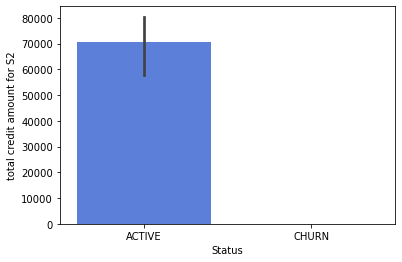

In [46]:
sns.barplot(data = df, x='Status', y= 'total credit amount for S2', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='total credit amount for S3'>

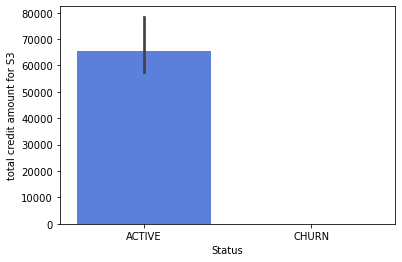

In [47]:
sns.barplot(data = df, x='Status', y= 'total credit amount for S3', estimator = np.median)

In [ ]:
# credit transaction are zero in all branchs in case of chrun customers,
# It seems to be like churn customers are to using credit card  because there is zero credit amount  for all branches.
# It means there are extreme values present in the data set(mean> median)

In [48]:
# analyzing total debit amount and total debit transactions wrt churn
pd.pivot_table(data= df, values =['total debit amount', 'total debit transactions'], index = ['Status'], aggfunc=['mean', 'median', 'max'])

mean                                      median  \
       total debit amount total debit transactions total debit amount   
Status                                                                  
ACTIVE       1.097967e+06               196.499022          283017.00   
CHURN        1.734027e+05                33.691630           20107.72   

                                               max                           
       total debit transactions total debit amount total debit transactions  
Status                                                                       
ACTIVE                    101.5        69972617.41                     1859  
CHURN                      14.0         9366032.26                      893

<AxesSubplot:xlabel='Status', ylabel='total debit amount'>

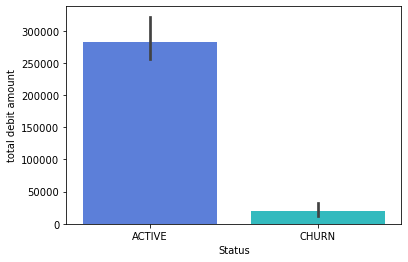

In [49]:
sns.barplot(data = df, x='Status', y= 'total debit amount', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='total debit transactions'>

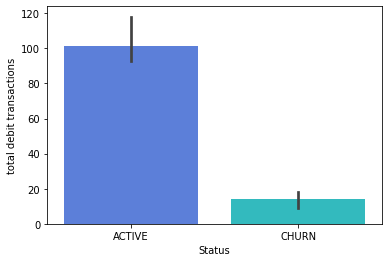

In [50]:
sns.barplot(data = df, x='Status', y= 'total debit transactions', estimator = np.median)

In [ ]:
# In case of chrun customers total debit amount and transaction are pretty low compare to active customers.

In [51]:
# analyzing total credit amount and total credit transactions wrt churn
pd.pivot_table(data= df, values =['total credit amount', 'total credit transactions'], index = ['Status'], aggfunc=['mean', 'median', 'max'])

mean                                        median  \
       total credit amount total credit transactions total credit amount   
Status                                                                     
ACTIVE        1.106460e+06                 28.365949           225062.56   
CHURN         1.264160e+05                  7.422907             5000.00   

                                                 max                            
       total credit transactions total credit amount total credit transactions  
Status                                                                          
ACTIVE                        20        1.043919e+08                       429  
CHURN                          1        7.890360e+06                       269

<AxesSubplot:xlabel='Status', ylabel='total credit amount'>

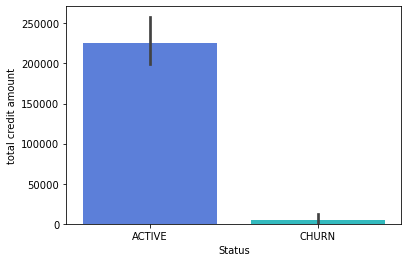

In [52]:
sns.barplot(data = df, x='Status', y= 'total credit amount', estimator = np.median)

<AxesSubplot:xlabel='Status', ylabel='total credit transactions'>

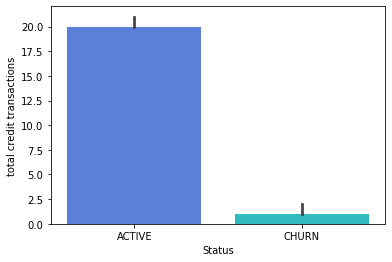

In [53]:
sns.barplot(data = df, x='Status', y= 'total credit transactions', estimator = np.median)

In [ ]:
# In case of chrun customers total credit amount and transaction are pretty low compare to active customers.

In [54]:
# analyzing total transaction
pd.pivot_table(data=df, values=['total transactions'], index = ['Status'], aggfunc=['mean', 'median', 'max'])

,mean,median,max
,total transactions,total transactions,total transactions
Status,,,
ACTIVE,224.864971,120.5,2174
CHURN,41.114537,17.0,1090


<AxesSubplot:xlabel='Status', ylabel='total transactions'>

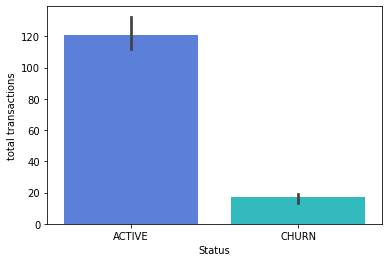

In [55]:
sns.barplot(data = df, x='Status', y= 'total transactions', estimator = np.median)

<AxesSubplot:>

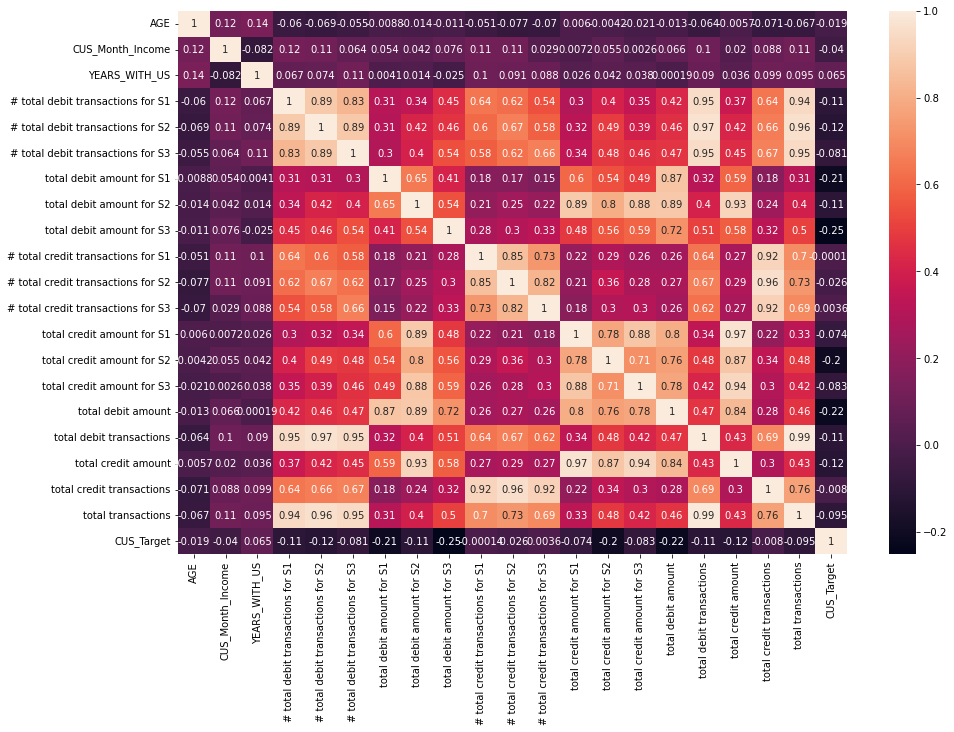

In [56]:
# checking correaltion before droping any columns
plt.figure(figsize=(15,10))
sns.set_palette('BuPu')
sns.heatmap(df.corr(), annot=True)

### Correlation between the variables convey lot of information about the realationship betweem them. There seems to be strong multicollinearity in the dataset.

In [57]:
# Droping unwanted columns
df.drop(['CIF', 'CUS_DOB','CUS_Month_Income','CUS_Customer_Since', 'YEARS_WITH_US','CUS_Target'], axis=1, inplace = True)

In [58]:
df.iloc[0:20, 10:23]

,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,TAR_Desc,Status
0,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,EXECUTIVE,ACTIVE
1,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,LOW,ACTIVE
2,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,MIDLE,ACTIVE
3,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,LOW,ACTIVE
4,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,LOW,ACTIVE
5,25,51,758585.68,539970.27,739082.52,1883962.89,490,2037638.47,95,585,MIDLE,ACTIVE
6,0,0,0.00,0.00,0.00,8693.60,3,0.00,0,3,LOW,CHURN
7,11,14,431653.01,492067.05,630958.47,1477803.14,422,1554678.53,32,454,LOW,ACTIVE
8,21,19,820952.00,1296021.03,1043510.33,3240369.08,877,3160483.36,49,926,EXECUTIVE,ACTIVE
9,5,7,0.00,130000.00,398046.93,535684.68,130,528046.93,12,142,LOW,ACTIVE


In [59]:
# Analyzing categorical columns
# checking different charater in categorical features
df.columns

Index(['AGE', 'CUS_Gender', 'CUS_Marital_Status',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'TAR_Desc',
       'Status'],
      dtype='object')

In [60]:
# analyzing Cus_gender
df['CUS_Gender'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [61]:
df['CUS_Gender'].value_counts()

MALE      741
FEMALE    506
Name: CUS_Gender, dtype: int64

In [62]:
# Analyzing marital Status
df['CUS_Marital_Status'].unique()

array(['MARRIED', 'SINGLE', 'WIDOWED', 'DIVORCE', 'OTHER', 'PARTNER'],
      dtype=object)

In [63]:
df['CUS_Marital_Status'].value_counts()

SINGLE     879
MARRIED    328
DIVORCE     30
WIDOWED     10
OTHER        1
PARTNER      1
Name: CUS_Marital_Status, dtype: int64

In [64]:
#analyzin tar desc
df['TAR_Desc'].unique()

array(['EXECUTIVE', 'LOW', 'MIDLE', 'PLATINUM'], dtype=object)

In [65]:
df['TAR_Desc'].value_counts()

LOW          753
MIDLE        406
EXECUTIVE     59
PLATINUM      31
Name: TAR_Desc, dtype: int64

In [66]:
df['Status'].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

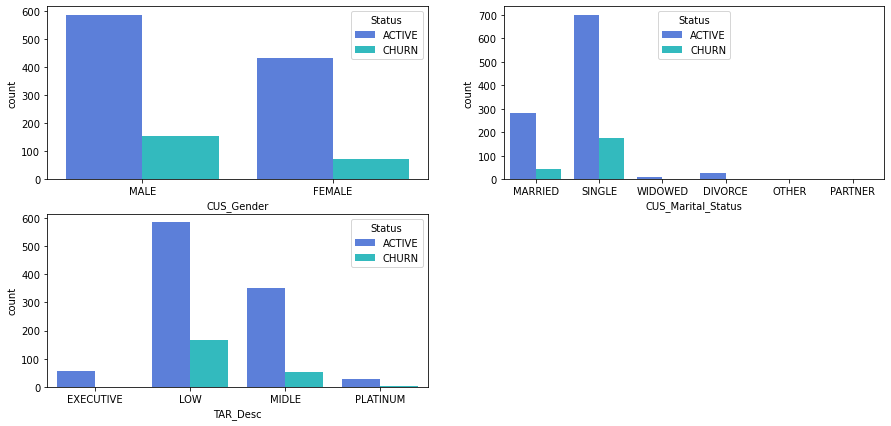

In [69]:
# analyzing categorical count w.r.t Status
list = ['CUS_Gender','CUS_Marital_Status','TAR_Desc']
plt.figure(figsize=(15,7))
for i,x in enumerate(list):
    plt.subplot(2,2,i+1)
    sns.set_palette("turbo")
    sns.countplot(data=df, x=df[x], hue='Status')

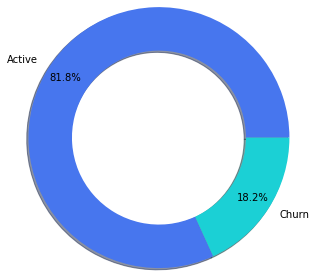

In [70]:
# Status distrbution
labels = ['Active', 'Churn']
values =[1022, 227]

plt.pie(values, labels= labels, radius= 1.5, autopct= '%2.1f%%', pctdistance = 0.85,
        shadow = True, labeldistance= 1.1, counterclock= True, wedgeprops={'width': 0.5})
plt.show()

# Checking for Normal Distribution of important columns
# Checking for outliers and guessing the reason behind outliers and
# Checking whether they are worthy to have it in our dataset or not required.

                                     Features Distribution                                      


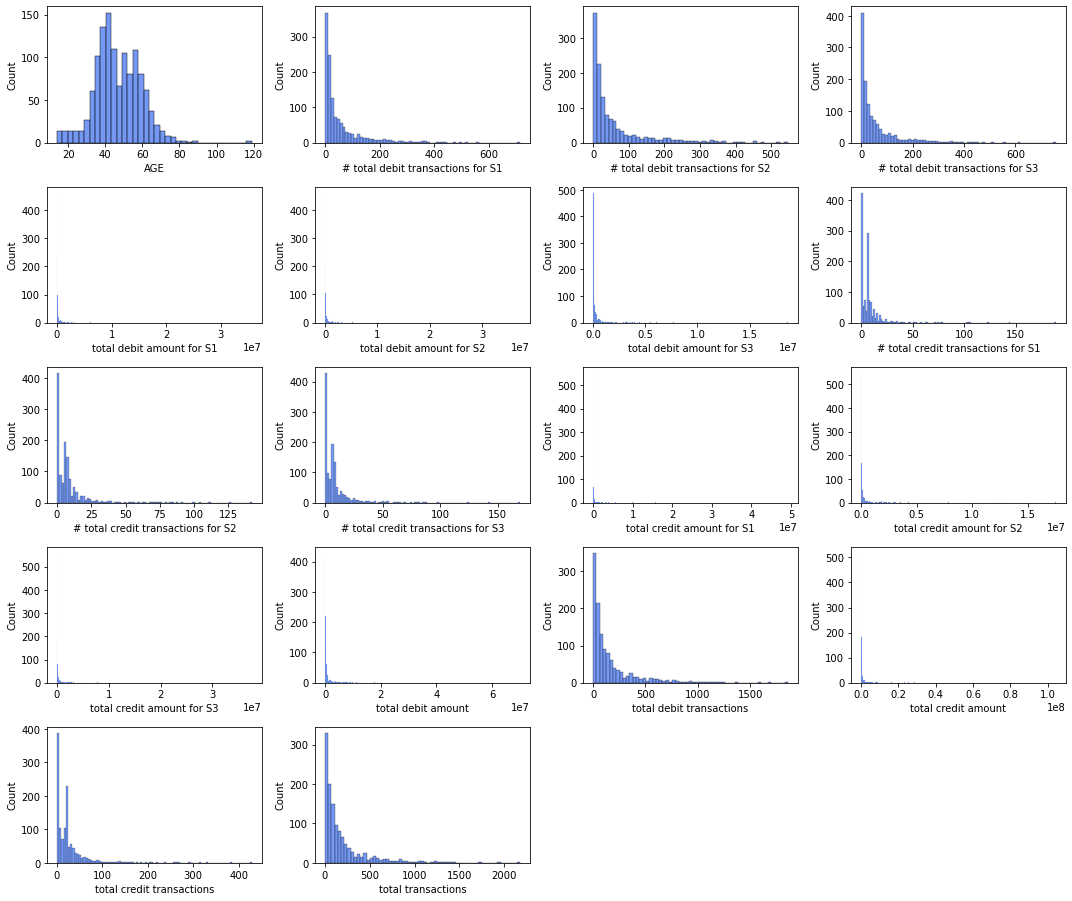

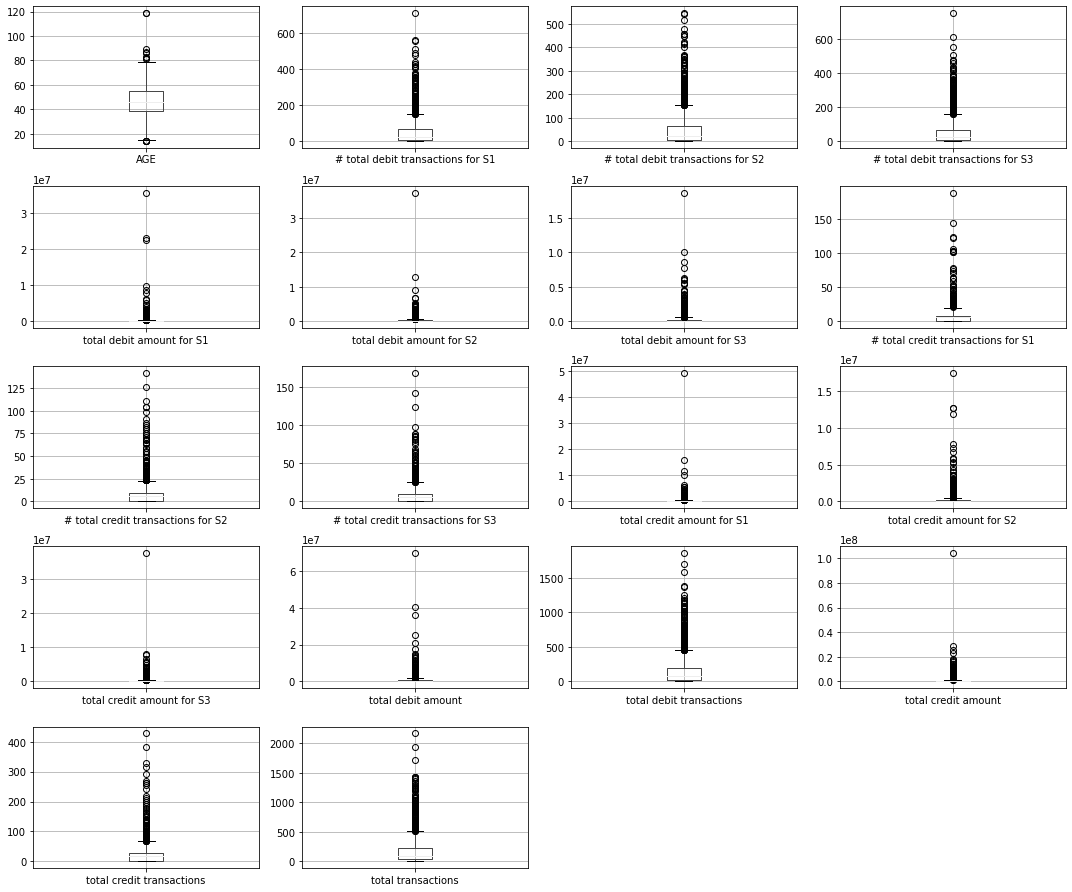

In [71]:
import math
print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in df if i not in ['CUS_Gender', 'CUS_Marital_Status','TAR_Desc', 'Status']]

n=4
plt.figure(figsize=[15,2.5*math.ceil(len(df)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(df)/n),n,c+1)
    sns.histplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,2.5*math.ceil(len(df)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(df)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

### Data is not normally distrbuted
### It seems to be like data contains high amount of Outlier
### It worthy to be have in dataset, because if there is high transaction there is also high debit amount, And most of the outliers are from Active customers.

# Data Pre-Processing

In [72]:
# Handling categorical columns
# So there is 2 nan value in Cus_gender, We can delete that nan value
df = df.dropna()

In [73]:
df.isnull().sum()

AGE                                   0
CUS_Gender                            0
CUS_Marital_Status                    0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
TAR_Desc                              0
Status                                0
dtype: int64

In [74]:
#converting gender in binary format 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded = label_encoder.fit(df['CUS_Gender'])
df['CUS_Gender'] = encoded.fit_transform(df['CUS_Gender'])

In [75]:
df['CUS_Gender'].value_counts()

1    741
0    506
Name: CUS_Gender, dtype: int64

In [76]:
# converting CUS_Marital_Status in binary format 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded = label_encoder.fit(df['CUS_Marital_Status'])
df['CUS_Marital_Status'] = encoded.fit_transform(df['CUS_Marital_Status'])

In [77]:
df['CUS_Marital_Status'].value_counts()

4    878
1    327
0     30
5     10
2      1
3      1
Name: CUS_Marital_Status, dtype: int64

In [78]:
# converted widowed, parter, other into single
# class with less than 1% converted into higher class count
df['CUS_Marital_Status'] = df['CUS_Marital_Status'].replace([2,3,5],[4,4,4])

In [79]:
df['CUS_Marital_Status'].value_counts()

4    890
1    327
0     30
Name: CUS_Marital_Status, dtype: int64

In [80]:
# converting TAR_Desc in to binary format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded = label_encoder.fit(df['TAR_Desc'])
df['TAR_Desc'] = encoded.fit_transform(df['TAR_Desc'])

In [81]:
df['TAR_Desc'].value_counts()

1    751
2    406
0     59
3     31
Name: TAR_Desc, dtype: int64

In [82]:
# converting Status into binary format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded = label_encoder.fit(df['Status'])
df['Status'] = encoded.fit_transform(df['Status'])

In [83]:
df['Status'].value_counts()

0    1022
1     225
Name: Status, dtype: int64

In [84]:
df.head(5)

,AGE,CUS_Gender,CUS_Marital_Status,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,TAR_Desc,Status
0,49,1,1,277,265,345,1459126.64,1230543.08,2068641.91,10,...,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,0,0
1,46,0,4,37,15,45,35372.55,20134.00,83856.67,2,...,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,1,0
2,53,0,4,31,14,8,28248.85,4777.66,4348.95,14,...,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2,0
3,15,0,4,0,1,0,0.00,4000.00,0.00,5,...,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,1,0
4,48,0,4,15,33,12,69083.38,223007.51,46379.40,8,...,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,1,0


In [85]:
df.shape

(1247, 22)

In [86]:
df2 = df.copy(deep=True)

In [87]:
#Splitting of data
X = df.iloc[:,:21]
print(X.head())

   AGE  CUS_Gender  CUS_Marital_Status  # total debit transactions for S1  \
0   49           1                   1                                277   
1   46           0                   4                                 37   
2   53           0                   4                                 31   
3   15           0                   4                                  0   
4   48           0                   4                                 15   

   # total debit transactions for S2  # total debit transactions for S3  \
0                                265                                345   
1                                 15                                 45   
2                                 14                                  8   
3                                  1                                  0   
4                                 33                                 12   

   total debit amount for S1  total debit amount for S2  \
0                 1459126.6

In [88]:
y = df.iloc[:,21:]
print(y.head())

   Status
0       0
1       0
2       0
3       0
4       0


## Balancing data using Smoteenn

In [89]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN()
X, y = smotenn.fit_resample(X,y)

In [90]:
# Sampling of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 1234)

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 21)
(1168, 1)
(293, 21)
(293, 1)


## Decision Tree

In [92]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
# trainig Accuracy
y_pred_train = model1.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred_train))
print(metrics.classification_report(y_train, y_pred_train))

[[541   0]
 [  0 627]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



In [94]:
#test accuracy
y_pred_test = model1.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

[[130  10]
 [  0 153]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       140
           1       0.94      1.00      0.97       153

    accuracy                           0.97       293
   macro avg       0.97      0.96      0.97       293
weighted avg       0.97      0.97      0.97       293



## Grid search for decision tree

In [95]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[6,8, 10,12],'min_samples_leaf':[2,4,6]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

In [96]:
predicted = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[130  10]
 [  5 148]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       140
           1       0.94      0.97      0.95       153

    accuracy                           0.95       293
   macro avg       0.95      0.95      0.95       293
weighted avg       0.95      0.95      0.95       293



## Decision Tree improves  Testing accuracy from 80 to 95 after using smoteenn

# Random Forest

In [97]:
model2 = RandomForestClassifier(n_estimators = 100, random_state=100)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [98]:
# trainig Accuracy
y_pred_trainR = model2.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred_trainR))
print(metrics.classification_report(y_train, y_pred_trainR))

[[541   0]
 [  0 627]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168



In [99]:
#test accuracy
y_pred_testR = model2.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_testR))
print(metrics.classification_report(y_test, y_pred_testR))

[[135   5]
 [  3 150]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       140
           1       0.97      0.98      0.97       153

    accuracy                           0.97       293
   macro avg       0.97      0.97      0.97       293
weighted avg       0.97      0.97      0.97       293



In [100]:
X_train.columns

Index(['AGE', 'CUS_Gender', 'CUS_Marital_Status',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'TAR_Desc'],
      dtype='object')

In [101]:
test1 = pd.DataFrame({'AGE':{1:45},
                     'CUS_Gender':{1:1},
                     'CUS_Marital_Status':{1:1},
                     '# total debit transactions for S1':{1:250},
                     '# total debit transactions for S2':{1:245},
                     '# total debit transactions for S3':{1:265},
                     'total debit amount for S1':{1:1022534},
                     'total debit amount for S2':{1:1512634},
                     'total debit amount for S3':{1:1945432},
                     '# total credit transactions for S1':{1:8},
                     '# total credit transactions for S2':{1:7},
                     '# total credit transactions for S3':{1:6},
                     'total credit amount for S1':{1:195600},
                     'total credit amount for S2':{1:176000},
                     'total credit amount for S3':{1:70500},
                     'total debit amount':{1:4480600},
                     'total debit transactions':{1:760},
                     'total credit amount':{1:442100},
                     'total credit transactions':{1:21},
                     'total transactions':{1:781},
                     'TAR_Desc':{1:2}})
test1

,AGE,CUS_Gender,CUS_Marital_Status,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,TAR_Desc
1,45,1,1,250,245,265,1022534,1512634,1945432,8,...,6,195600,176000,70500,4480600,760,442100,21,781,2


In [102]:
#test accuracy
pred = model2.predict(test1)
pred

array([0])

## Before using Smoteenn Random Forest 100% training and 90% testing 
## After using Smoteenn or(after balancing data) testing Accuracy 97%  